In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from src.cifar_autoencoder import CifarDataSet, AutoEncoder, train
from src.cifar_graph_classifier import Net
from torch.utils.data import DataLoader

In [3]:
train_ds = CifarDataSet(
            batch_dir_path="/home/pranjal/pytorch/Datasets/cifar-10-batches-py/", mode="train"
        )
test_ds = CifarDataSet(
    batch_dir_path="/home/pranjal/pytorch/Datasets/cifar-10-batches-py/", mode="test"
)
sample_ds = CifarDataSet(
    batch_dir_path="/home/pranjal/pytorch/Datasets/cifar-10-batches-py/", mode="sample"
)

In [4]:
m = AutoEncoder()

In [5]:
tl = DataLoader(test_ds,batch_size=64)

In [6]:
ops = train(m, tl, 4)

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch:1, Loss:0.1648


  0%|          | 0/157 [00:00<?, ?it/s]

Epoch:2, Loss:0.0253


  0%|          | 0/157 [00:00<?, ?it/s]

Epoch:3, Loss:0.0184


100%|██████████| 157/157 [04:45<00:00,  1.82s/it]

Epoch:4, Loss:0.0165


In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
all_losses = []
index = 0
for i,x in ops[-1]:
    all_losses.append({"counter":index,"epoch":i+1,"iteration":index+1,"loss":x})
    index+=1

In [9]:
loss_df = pd.DataFrame(all_losses)

<AxesSubplot:xlabel='counter', ylabel='loss'>

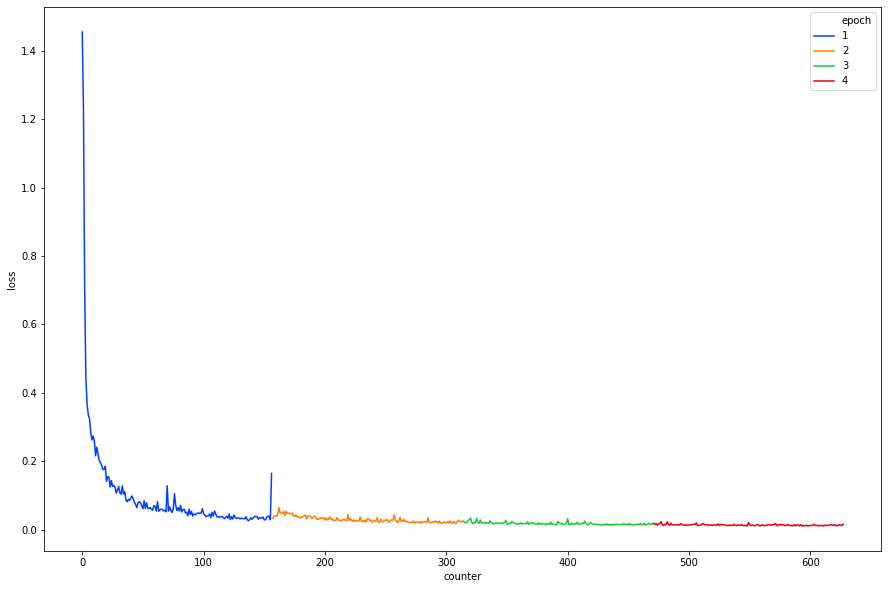

In [10]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

In [11]:
imgs = ops[0][-1][1].reshape(-1,3,32,32).numpy()

In [12]:
imgs = imgs.transpose(0,2,3,1)

In [13]:
pred = ops[0][-1][2].reshape(-1,3,32,32).detach().numpy()

In [14]:
pred = pred.transpose(0,2,3,1)

In [42]:
index = 2

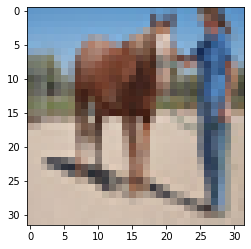

In [43]:
plt.imshow(imgs[index])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


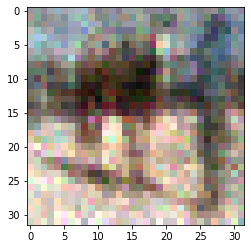

In [44]:
plt.imshow(pred[index])

In [45]:
n = Net(num_classes=10,
        encoder_model=m,
        sample_dataset=sample_ds,
        train_dataset=train_ds,
        num_epochs=3,
        learning_rate=1e-3,
        seed=42,
        use_graph=True)

2021-01-18 22:18:26.677 | INFO     | src.cifar_graph_classifier:__init__:55 - Computing the embedding for the train dataset
100%|██████████| 469/469 [03:05<00:00,  2.53it/s]
2021-01-18 22:21:36.957 | INFO     | src.cifar_graph_classifier:__init__:61 - Will use graph to augment features
2021-01-18 22:21:36.975 | INFO     | src.cifar_graph_classifier:__init__:62 - Computing the embedding for the sample dataset
100%|██████████| 157/157 [01:32<00:00,  1.69it/s]


2021-01-18 22:32:06.337 | INFO     | src.cifar_graph_classifier:sanity_test:306 - label of current x = tensor([6])
2021-01-18 22:32:07.914 | INFO     | src.cifar_graph_classifier:test_forward_run:199 - x.shape = torch.Size([1, 1024])
2021-01-18 22:32:07.959 | INFO     | src.cifar_graph_classifier:test_forward_run:200 - x[:,:10] = tensor([[ 0.1669,  0.8471, -1.1806,  0.8641,  1.4848,  1.2104, -1.0024,  1.6271,
          0.5669, -1.0076]])
2021-01-18 22:32:07.961 | INFO     | src.cifar_graph_classifier:test_forward_run:201 - sample_xs.shape = torch.Size([2048, 1024])
2021-01-18 22:32:07.966 | INFO     | src.cifar_graph_classifier:test_forward_run:202 - sample_xs[:5,:10] = tensor([[ 0.6210,  1.0079, -0.4987,  0.5084,  1.2088,  0.8271, -0.4259,  0.7613,
          0.1895, -0.5158],
        [-0.9869, -0.1967, -3.4686,  0.0655,  0.0514,  3.6085, -1.7178,  2.4890,
          1.6483, -1.3968],
        [ 1.2763,  0.8143,  0.1410, -0.5203,  1.0464,  0.9978,  0.0300,  0.1466,
          0.2494, -0.3

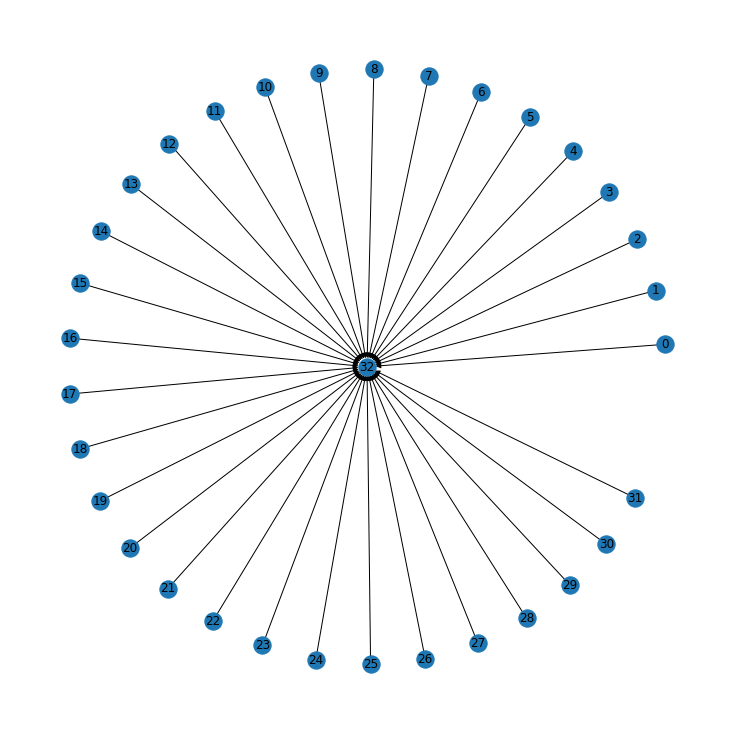

In [46]:
n.sanity_test()

In [47]:
loss = n.train()

2021-01-18 22:32:29.627 | INFO     | src.cifar_graph_classifier:train:287 - Epoch 1 of 3
100%|██████████| 469/469 [04:02<00:00,  1.94it/s]
2021-01-18 22:36:31.770 | INFO     | src.cifar_graph_classifier:train:287 - Epoch 2 of 3
100%|██████████| 469/469 [03:48<00:00,  2.05it/s]
2021-01-18 22:40:20.487 | INFO     | src.cifar_graph_classifier:train:287 - Epoch 3 of 3
100%|██████████| 469/469 [03:48<00:00,  2.05it/s]


In [48]:
all_losses = []
index = 0
for i,x in enumerate(loss):
    for j,y in enumerate(x):
        all_losses.append({"counter":index,"epoch":i+1,"iteration":j+1,"loss":y})
        index+=1

In [49]:
loss_df = pd.DataFrame(all_losses)

# w/o graph

<AxesSubplot:xlabel='counter', ylabel='loss'>

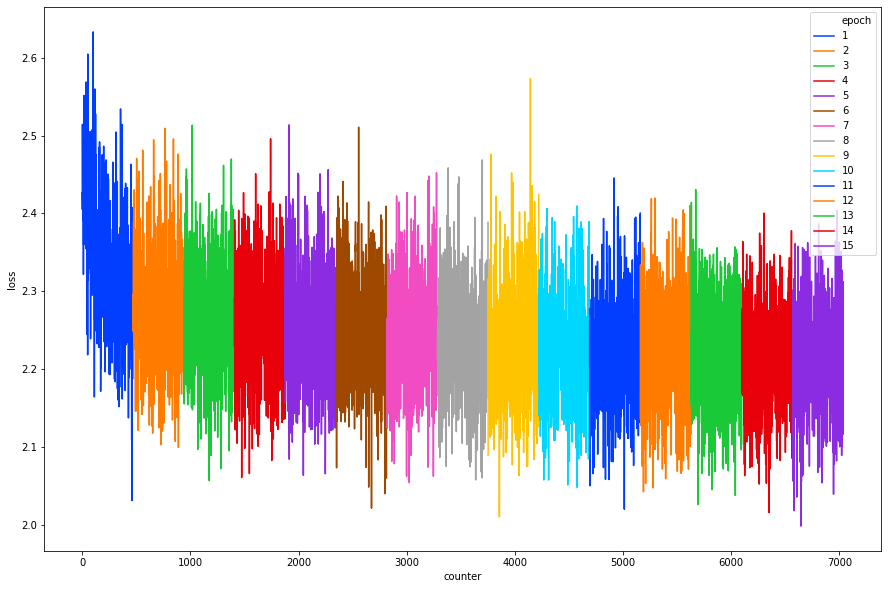

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

# w graph

<AxesSubplot:xlabel='counter', ylabel='loss'>

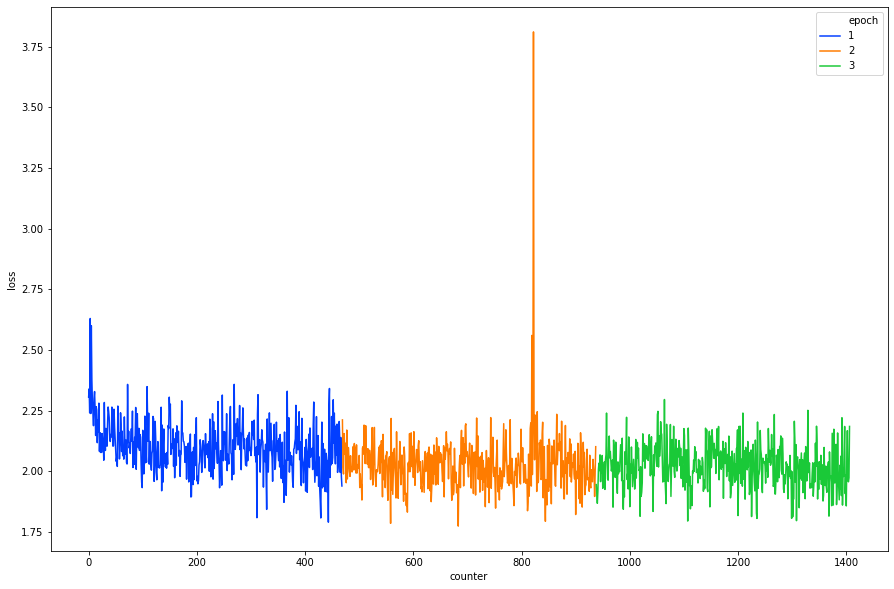

In [50]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

In [51]:
clf_test_loader = n.get_encoding(sample_ds, 64)

100%|██████████| 157/157 [01:10<00:00,  2.22it/s]


In [52]:
from tqdm import tqdm
import torch

In [53]:
res = []
for data in tqdm(clf_test_loader):
    img, label = data
    recon = n.forward(img)
    _, preds = torch.max(recon, 1)
    bool_tensor = preds == label
    res.append(torch.stack([label,bool_tensor,preds],dim=1))

100%|██████████| 157/157 [00:36<00:00,  4.33it/s]


In [54]:
all_res = torch.cat(res,dim=0)

In [55]:
import numpy as np

In [56]:
df_test_res = pd.DataFrame(all_res.numpy(),columns=["class","res","pred_class"])

# w graph

In [57]:
df_test_res.groupby("res").count()/df_test_res.shape[0]

,class,pred_class
res,,
0,0.7572,0.7572
1,0.2428,0.2428


In [58]:
confusion_matrix = pd.crosstab(df_test_res['class'], df_test_res['pred_class'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,364,118,12,5,40,49,66,60,219,70
1,43,313,2,2,20,23,112,142,174,132
2,98,86,14,1,272,96,300,96,38,40
3,39,88,9,6,149,150,250,195,12,78
4,31,54,9,0,318,84,345,81,44,38
5,41,107,9,6,163,196,221,199,18,61
6,9,47,6,5,273,79,430,98,13,44
7,18,83,5,3,151,88,259,244,40,90
8,249,173,20,1,30,37,51,64,322,77
